<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/Assigment_1_Session_5_s8091335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [421]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

The code above imports and uses the get_python function to reset the current environment. It is optional.

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import libraries: Pandas for dataframe manipulation, Matplotlib and Seaborn for visualization.

The convention "print(df.head())" to review the dataframe is not applied as it is more visual to use the variable inspector window within Spyder, Anaconda notebook, Google Colab notebook. Hence, the code and the whole notebook are much more clear.

In [194]:
df = pd.read_excel('Food_dataset.xlsx')

Read the tabular dataset and assign to "df" dataframe.

# 1. Does variable "Item" vary between different types of Stores (i.e. variable "Store")? Identify data, analyse, visualise and discuss results (100words)  

In [195]:
grouped_stores = df.groupby(['Store ', 'Item'])['quantity'].sum().reset_index()

Use a sequential function: groupby() -> sum() -> reset_index() to group items (in "Item" column) by store types (in "Store " column), following by the total quantity of sold items, into a new dataframe "grouped_stores".

In [285]:
# Create a distinctive pallete
num_categories = len(grouped_stores['Item'])
color_palette = sns.color_palette("hls", n_colors=num_categories)

Because there are 17 item types, it is necessary to get a pallete of different color. First, get the number of item in "Item" column by using len() function. Next, use the color_palette() function in Seaborn with arguments:
* "hls" common color space (Choosing color palettes, n.d.)
* "n_colors=num_categories" get the number of colors (here is 17)

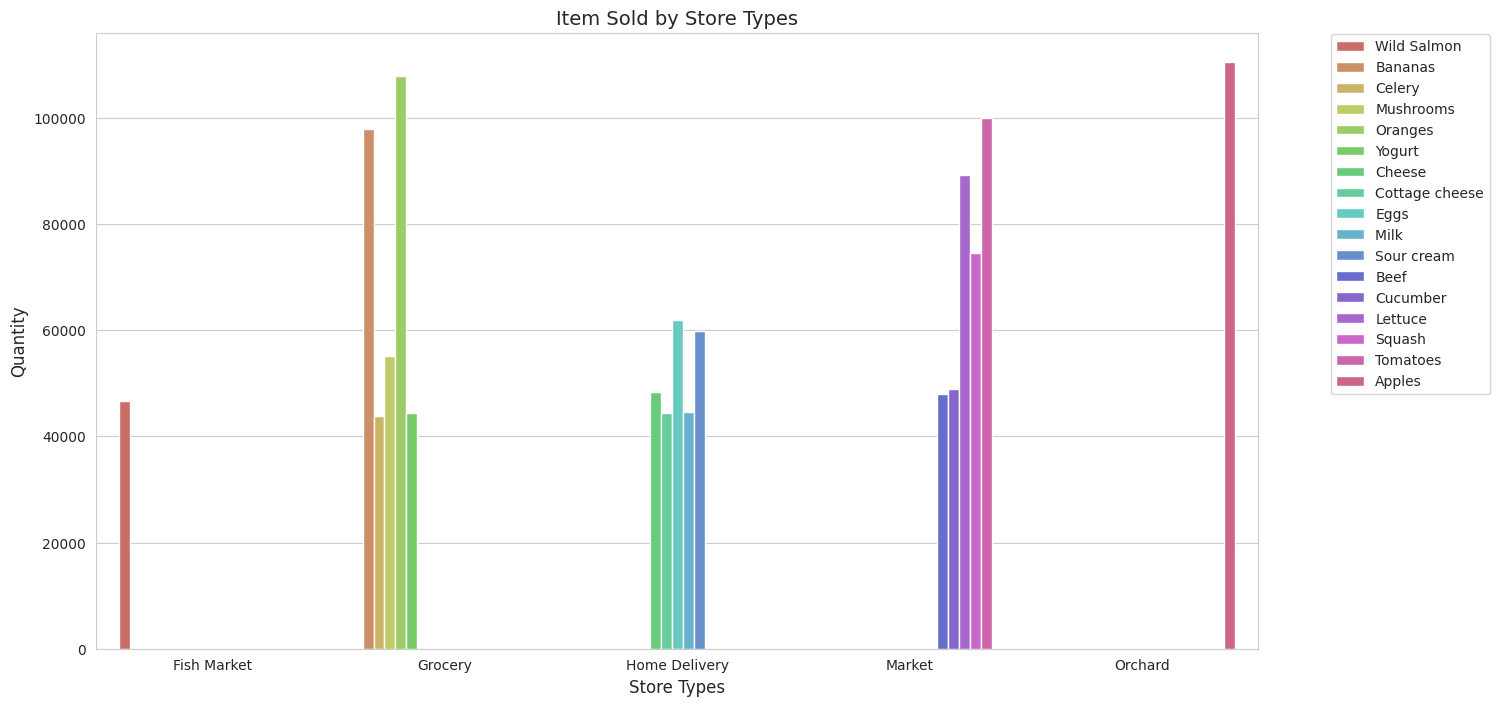

In [286]:
# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x=grouped_stores['Store '], y=grouped_stores['quantity'], hue="Item", data=grouped_stores, palette=color_palette)
plt.xlabel('Store Types', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Item Sold by Store Types', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0.1)

plt.show()

Use Seaborn's function barplot() to make up a figure. Then, use functions in Matplotlib to add labels, title, legend, size of figure.

In [253]:
item_counts_each_store = grouped_stores.groupby('Store ')['Item'].count().reset_index()
print(item_counts_each_store)

          Store   Item
0    Fish Market     1
1        Grocery     5
2  Home Delivery     5
3         Market     5
4        Orchard     1


In [252]:
unique_item_counts_each_store = grouped_stores.groupby('Store ')['Item'].nunique().reset_index()
print(unique_item_counts_each_store)

          Store   Item
0    Fish Market     1
1        Grocery     5
2  Home Delivery     5
3         Market     5
4        Orchard     1


Looking at the figure generated above, there is no store type that has the same product (or item type). However, it is crucial to double check that argument.

The first step is to create a dataframe from groupby() and count() functions to get the number of items within each store type. The second step is to create a dataframe from groupby() and nunique() functions to get the number of unique items within each store type. Two dataframes are the same, implying that each store type has distinctive products.

# 2. Identify item ids where the supplier is in Tasmania supply to Market ("Store type")? Identify data, analyse, visualise and discuss result (200words)

In [289]:
Tas_to_Market = df[(df['suplier location ']=='Tasmania') & (df['Store ']=='Market')]

Create a new dataframe "Tas_to_Market" by applying the conditions "=='Tasmania" to "suplier location " column (to filter all rows contain that string) and "=='Market'" to "Store " column (to filter all rows contain that string).

In [310]:
by_supplier_quantity = Tas_to_Market.groupby('suplier')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

Create a dataframe "by_sypplier_quantity" to store the sum of quantity of each spplier. Use the groupby() function to group all quantity ("quantity" column) values by groups of suppliers ("suplier" column). Then, apply the reset_index() to transform the Groupby object into dataframe. The reason is to apply the sort_values() function to sort descendingly (highest to lowest) quantity sum values.

In [311]:
print(by_supplier_quantity)

                                suplier  quantity
4  Grocery Industries Australia Pty Ltd    7313.5
3                Complete Food Services    5979.0
1                Bera Foods Wholesalers    5086.0
7                         Quality Foods    4624.0
2                      Bruno Fine Foods    2548.0
0                       Basfoods Direct    1847.0
5               Kahvecioglu Grand Foods    1116.0
6             Mediterranean Wholesalers     562.0


Print out the dataframe. It shows that "Grocery Industries Australia Pty Ltd" is the highest supplier in term of quantity supplied of items in Tasmania.




In [358]:
by_supplier_item_id_counts = Tas_to_Market.groupby('suplier')['Item_id'].count().reset_index().sort_values('Item_id', ascending=False)

Create a dataframe "by_supplier_item_id_counts" to store the sum of quantity of each spplier. Use the groupby() function to group all item_ids ("Item_id" column) values by groups of suppliers ("suplier" column). Next, apply the count() function to count all non-null values. Then, apply the reset_index() to transform the Groupby object into dataframe. The reason is to apply the sort_values() function to sort descendingly (highest to lowest) number of each Item ID.

In [360]:
print(by_supplier_item_id_counts)

                                suplier  Item_id
3                Complete Food Services        7
4  Grocery Industries Australia Pty Ltd        7
7                         Quality Foods        4
1                Bera Foods Wholesalers        3
0                       Basfoods Direct        2
2                      Bruno Fine Foods        2
5               Kahvecioglu Grand Foods        1
6             Mediterranean Wholesalers        1


Print out the dataframe. It shows that "Complete Food Services" and "Complete Food Services" have 7 items (or their own products), highest compared to the rest.

In [312]:
by_item_quantity = Tas_to_Market.groupby('Item')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

Create a dataframe "by_item_quantity" to store the sum of quantity of each spplier. Use the groupby() function to group all item_ids ("Item_id" column) values by groups of suppliers ("suplier" column). Next, apply the sum() function to sum up all quantity of each item. Then, apply the reset_index() to transform the Groupby object into dataframe. The reason is to apply the sort_values() function to sort descendingly (highest to lowest) sum quantity of each Item ID.

In [313]:
print(by_item_quantity)

       Item  quantity
4  Tomatoes    9278.5
2   Lettuce    9240.0
3    Squash    6439.0
0      Beef    2711.0
1  Cucumber    1407.0


Print out the dataframe. It shows that tomatoes and lettuce are so-called the most purchasesd products by customers in term of quantity.

In [338]:
grouped_supplier_item_quantity = Tas_to_Market.groupby(['suplier', 'Item'])['Item_id'].size().reset_index().sort_values('Item_id', ascending=False)

The same convention as above. The groupby() function is used to group all item IDs by suppliers then item.

In [339]:
print(grouped_supplier_item_quantity)

                                 suplier      Item  Item_id
6                 Complete Food Services   Lettuce        4
11  Grocery Industries Australia Pty Ltd    Squash        2
15                         Quality Foods      Beef        2
5                       Bruno Fine Foods  Tomatoes        2
8                 Complete Food Services  Tomatoes        2
12  Grocery Industries Australia Pty Ltd  Tomatoes        2
10  Grocery Industries Australia Pty Ltd   Lettuce        2
0                        Basfoods Direct  Cucumber        1
16                         Quality Foods  Cucumber        1
14             Mediterranean Wholesalers   Lettuce        1
13               Kahvecioglu Grand Foods   Lettuce        1
9   Grocery Industries Australia Pty Ltd      Beef        1
1                        Basfoods Direct   Lettuce        1
7                 Complete Food Services    Squash        1
4                 Bera Foods Wholesalers  Tomatoes        1
3                 Bera Foods Wholesalers

It shows that lettuce from "Complete Food Services" is the the most diverse pruoduct with 4 item IDs.

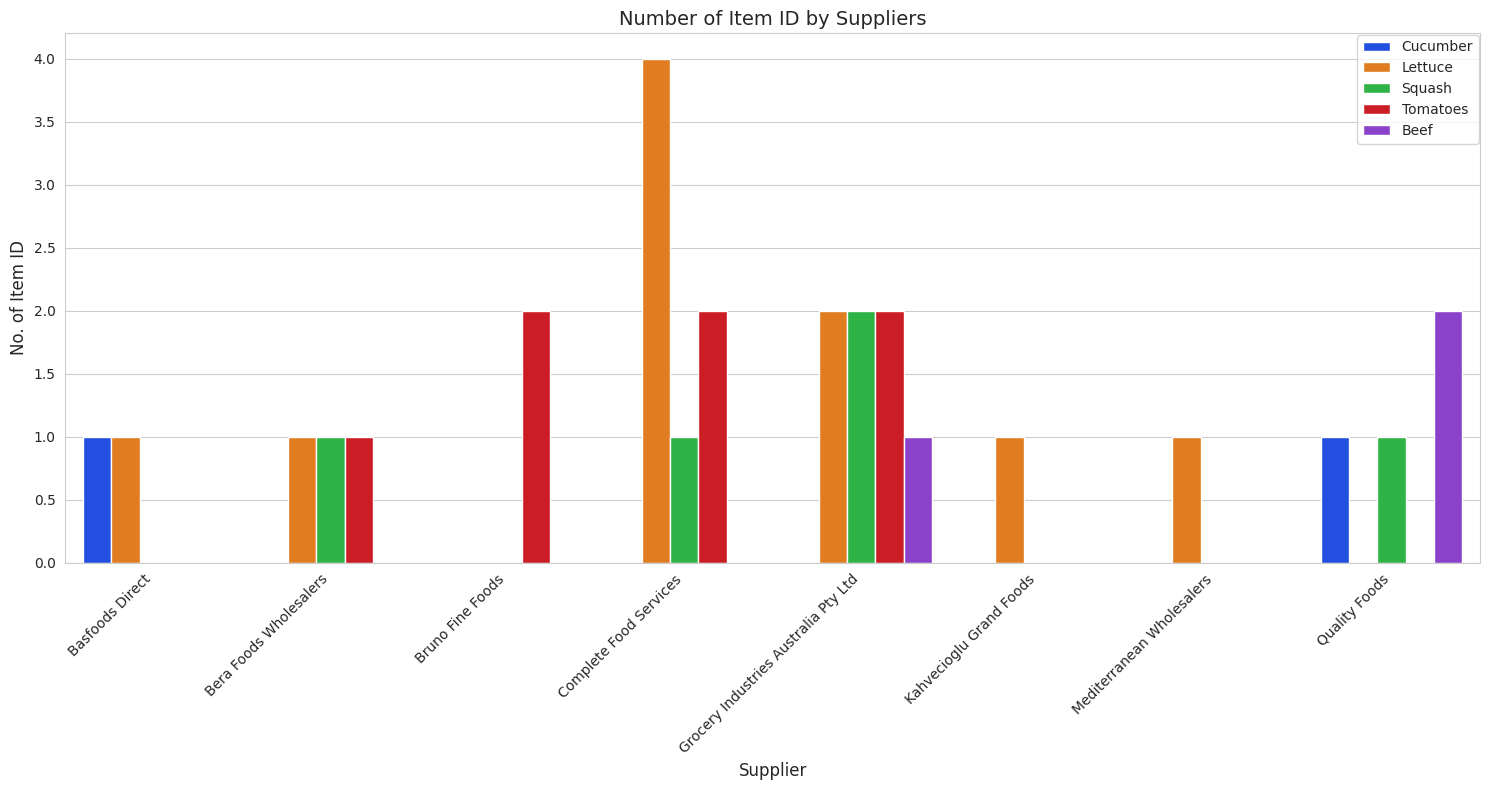

In [335]:
# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x=grouped_supplier_item_quantity['suplier'], y=grouped_supplier_item_quantity['Item_id'], hue="Item", data=grouped_supplier_item_quantity, palette='bright')
plt.xlabel('Supplier', fontsize=12)
plt.ylabel('No. of Item ID', fontsize=12)
plt.title('Number of Item ID by Suppliers', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Identify items product sold prices between $5.00  and  $12.00 and visualise result. (must use Python language). Discuss what you have learned from the data outcome (100words)

In [377]:
price_5_12 = df[(df['sold price ']>=5) & (df['sold price ']<=12)].sort_values('sold price ', ascending=False)

Create a new dataframe "price_5_12" by applying the conditions ">=5" and "<=12" to "sold price " column (to filter all values between that range).

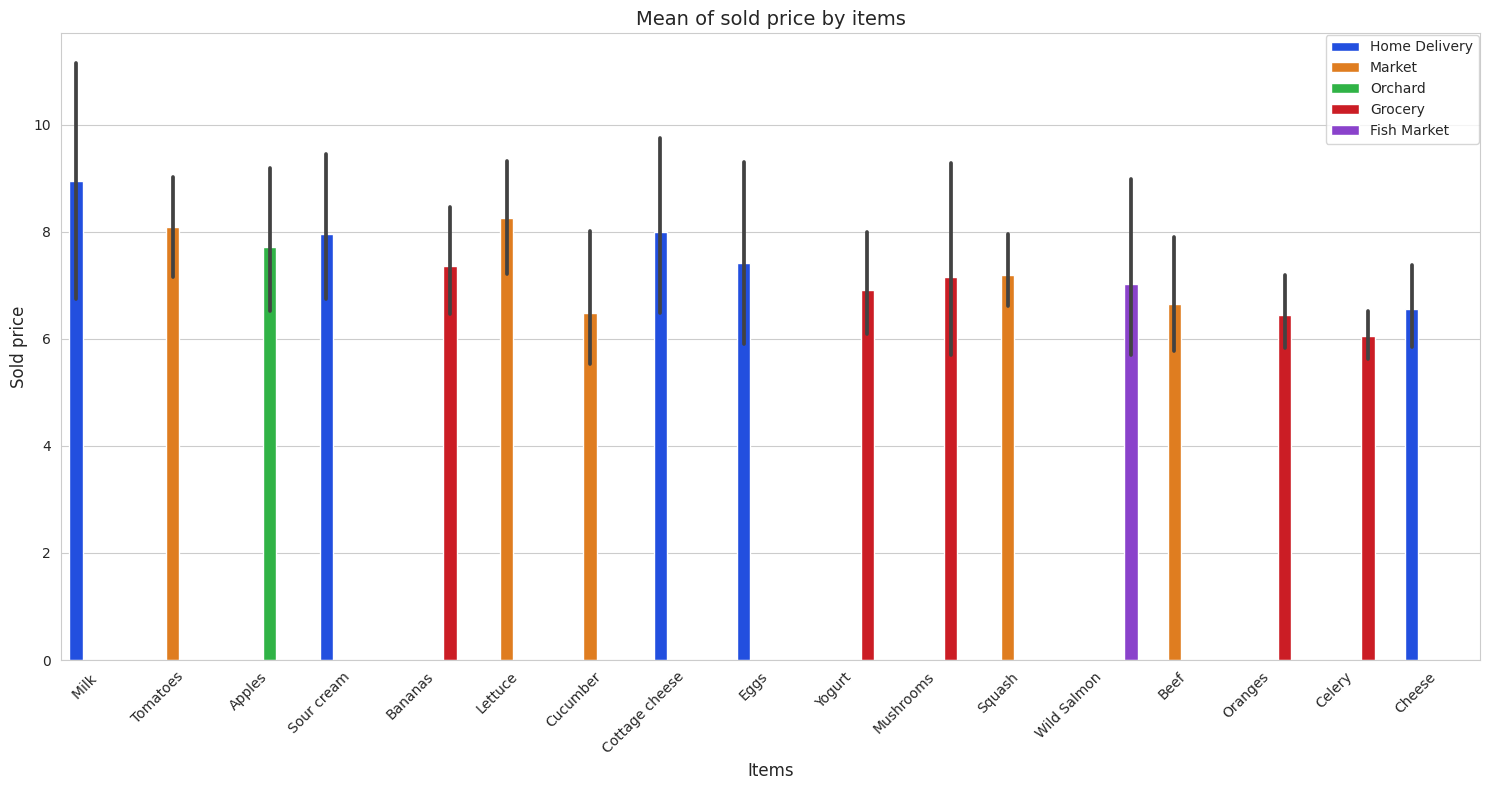

In [415]:
# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x=price_5_12['Item'], y=price_5_12['sold price '], hue='Store ', data=price_5_12, palette='bright')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Sold price', fontsize=12)
plt.title('Mean of sold price by items', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Use the sns.barplot() function with "hue='Store ' argument to get the bar chart with that legend as above.

In [416]:
list_supliers = price_5_12['suplier'].unique()
print(f'There are {len(list_supliers)} suppliers in the sold price range between $5 and $12. They are:\n {list_supliers}')

There are 17 suppliers in the sold price range between $5 and $12. They are:
 ['Bruno Fine Foods' 'Real Food Distributors' 'Basfoods Direct'
 'Kahvecioglu Grand Foods' 'Bera Foods Wholesalers'
 'Complete Food Services' 'Basfoods Direct - Somerton Store'
 'NSM Foods Direct to Public Outlet Store'
 'Grocery Industries Australia Pty Ltd' 'Mediterranean Wholesalers'
 'Royal Foods Australia Pty. Ltd.' 'Japan Foods Trading' 'Quality Foods'
 'Glendal Foods' 'First Ray' 'Delta Sales' 'Marchetti Fine Foods']


Apply the unique() function to the 'supplier' column to get the list of all suppliers within the current dataframe. The len() function is used to count the number of suppliers.

In [412]:
list_items = price_5_12['Item'].unique()
print(f'There are {len(list_items)} unique items in the sold price range between $5 and $12. They are: \n{list_items}')

There are 17 unique items in the sold price range between $5 and $12. They are: 
['Milk ' 'Tomatoes' 'Apples' 'Sour cream' 'Bananas' 'Lettuce' 'Cucumber'
 'Cottage cheese' 'Eggs' 'Yogurt' 'Mushrooms' 'Squash' 'Wild Salmon'
 'Beef' 'Oranges' 'Celery' 'Cheese']


Apply the unique() function to the 'Item' column to get the list of all items within the current dataframe. The len() function is used to count the number of items.

In [414]:
list_locations = price_5_12['suplier location '].unique()
print(f'There are {len(list_locations)} locations/states in the argument of the sold price range between $5 and $12. They are: \n{list_locations}')

There are 7 locations/states in the argument of the sold price range between $5 and $12. They are: 
['NSW ' 'South Australia ' 'Northern Territory' 'Western Australia '
 'Tasmania' 'Queensland' 'The Australian Capital Territory']


Apply the unique() function to the 'suplier location ' column to get the list of all supplier's locations the current dataframe. The len() function is used to count the number of locations.

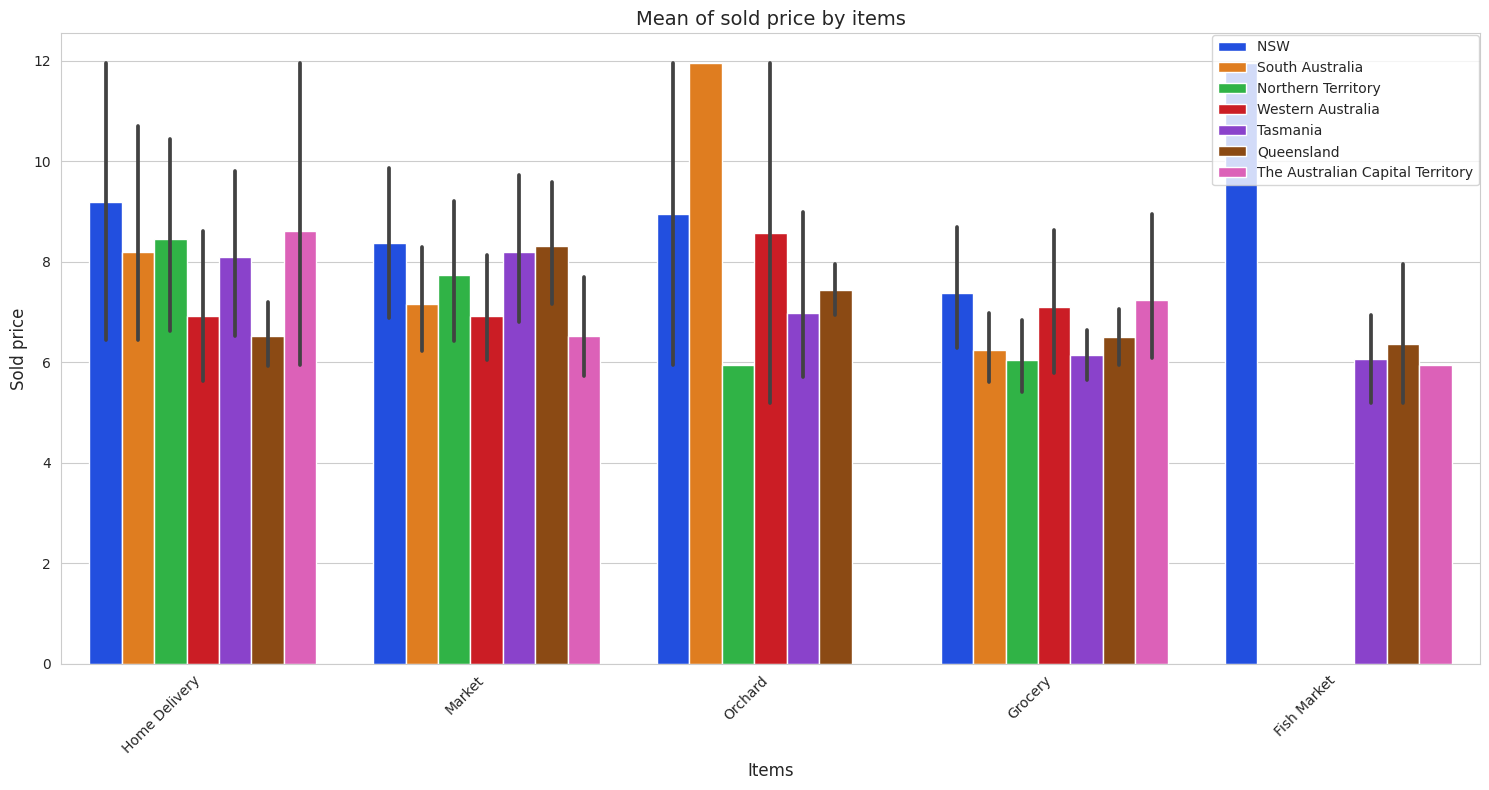

In [418]:
# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x=price_5_12['Store '], y=price_5_12['sold price '], hue='suplier location ', data=price_5_12, palette='bright')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Sold price', fontsize=12)
plt.title('Mean of sold price by items', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

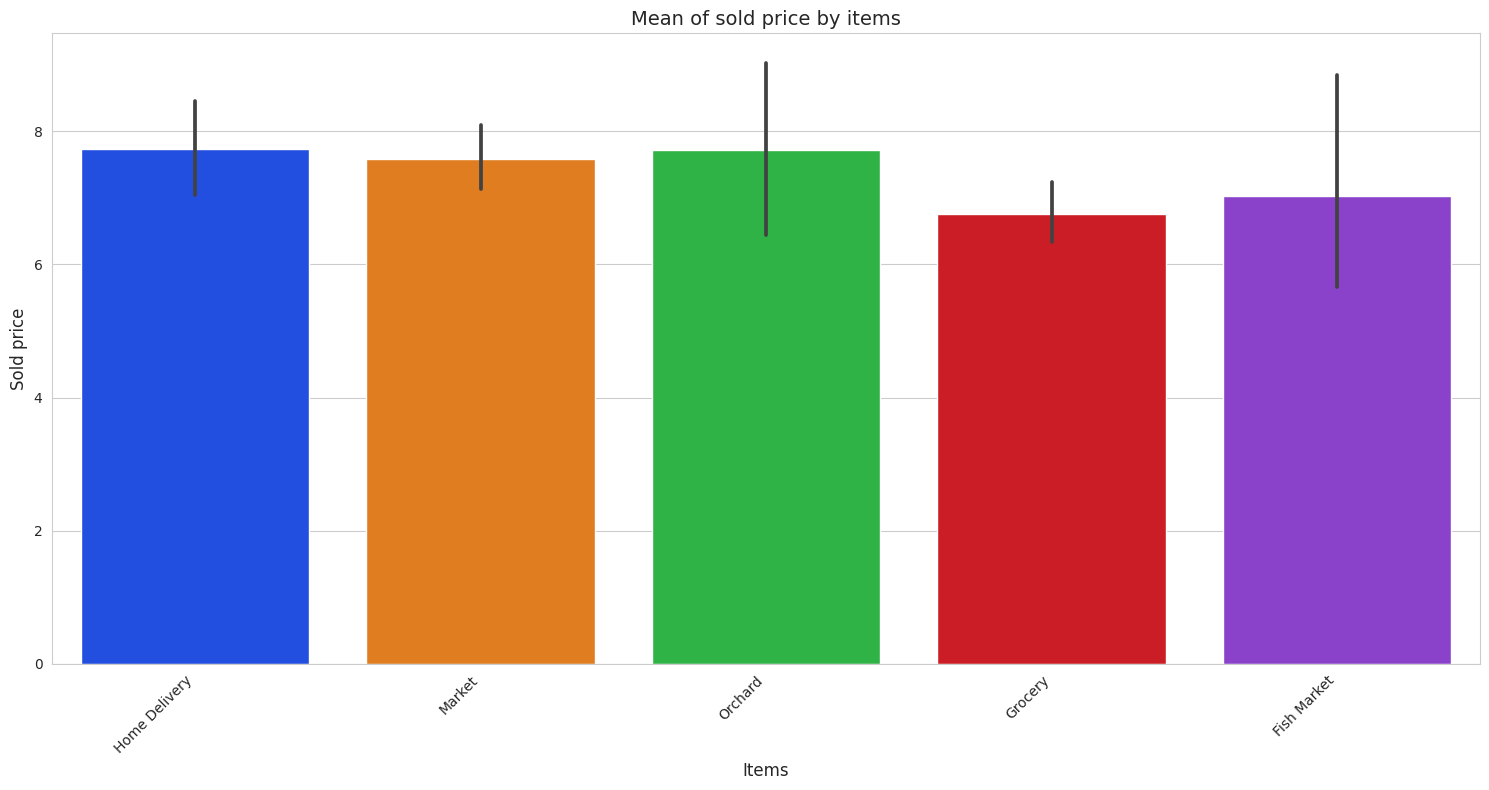

In [420]:
# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x=price_5_12['Store '], y=price_5_12['sold price '], data=price_5_12, palette='bright')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Sold price', fontsize=12)
plt.title('Mean of sold price by items', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Reference

Choosing color palettes (no date) seaborn.pydata.org. Available at: https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes